In [12]:
%load_ext autoreload
%autoreload 2
import torch
import Neural_Network as Ml

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
stride = 4

In [14]:
file_path1 = "DataLoader/total-with ndvi-monthly-train-1396-1399.csv"
file_path2 = "DataLoader/total-with ndvi-monthly-train-1398-1399.csv"
file_path3 = "DataLoader/total-without ndvi-monthly-train1396-1399.csv"
file_path4 = "DataLoader/total-without ndvi-monthly-train1398-1399.csv"
file_path5 = "DataLoader/total-without ndvi-monthly-train1396-13992.csv"
file_path = [file_path1, file_path2, file_path3, file_path4, file_path5]
data = Ml.DataLoader(file_path[stride], random_state=42)  # here
torch.manual_seed(42)
train_data, train_y, test_data, test_y = data.data_prepared()

In [15]:
if stride in [0,1]:
    input_layer = 5  # here
elif stride == 4:
    input_layer = 3
else:
    input_layer = 4 # here
    
hidd1 = 64
hidd2 = 64
out = 1

model = Ml.AOV_prediction(input_layer, hidd1, hidd2, out)
model, [epoch_count, loss_values, test_loss_values] = Ml.flow(model, [train_data, train_y], [test_data, test_y],
                                                              epochs=40, batch_size=8, lr=0.01)

Epoch: 0 | Loss: 0.09945061802864075 | Test_Loss: 0.12554246187210083
Epoch: 10 | Loss: 0.015365389175713062 | Test_Loss: 0.022054502740502357
Epoch: 20 | Loss: 0.010458054952323437 | Test_Loss: 0.012357836589217186
Epoch: 30 | Loss: 0.008633292280137539 | Test_Loss: 0.010478662326931953


r2 is : 0.8131837339500518


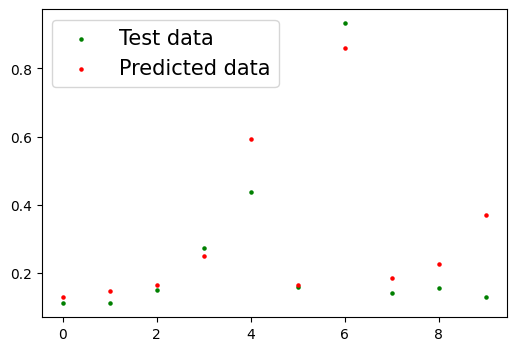

In [16]:
Ml.test_model(model, [test_data, test_y])

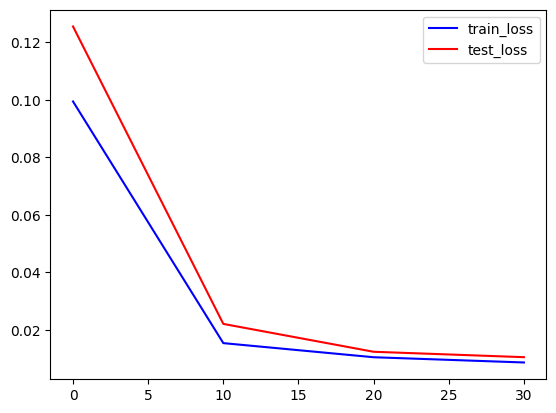

In [17]:
import matplotlib.pyplot as plt

plt.plot(epoch_count, loss_values, c="b", label="train_loss")
plt.plot(epoch_count, test_loss_values, c="r", label="test_loss")
plt.legend();

In [10]:
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)
model_name1 = "AOV_prediction_with_ndvi_1396_1399.pth"
model_name2 = "AOV_prediction_with_ndvi_1398_1399.pth"
model_name3 = "AOV_prediction_without_ndvi_1396_1399.pth"
model_name4 = "AOV_prediction_without_ndvi_1398_1399.pth"
model_name5 = "AOV_prediction_without_ndvi_1396_13992.pth"
model_name = [model_name1, model_name2, model_name3, model_name4, model_name5]

model_saved_path = model_path / model_name[stride] # here

In [11]:
torch.save(model.state_dict(), model_saved_path)

In [93]:
model_load = Ml.AOV_prediction(input_layer, hidd1, hidd2, out)
model_load.load_state_dict(torch.load(model_saved_path))

<All keys matched successfully>

In [97]:
import pandas as pd
data = pd.read_csv("DataLoader/total-with ndvi-monthly-train-1396-1399.csv")

In [105]:
a = torch.tensor(data.iloc[:,2:].values).type(torch.float)

In [106]:
model_load.eval()
with torch.inference_mode():
    y_pred = model_load(a)

In [107]:
y_pred

tensor([[157.8237],
        [152.9922],
        [145.8997],
        [146.5228],
        [141.9086],
        [146.4308],
        [151.0598],
        [152.3799],
        [158.2389],
        [166.0247],
        [167.3692],
        [164.7373],
        [158.2332],
        [150.2070],
        [145.3335],
        [141.1309],
        [140.2039],
        [142.9225],
        [145.6826],
        [151.7896],
        [158.8471],
        [164.4970],
        [166.4258],
        [162.8035],
        [159.8013],
        [150.3307],
        [145.7789],
        [141.3507],
        [134.5362],
        [140.6216],
        [146.3170],
        [149.6146],
        [157.6352],
        [162.4065],
        [163.5764],
        [160.5073],
        [157.4507],
        [150.4314],
        [142.2101],
        [140.2192],
        [140.9176],
        [144.4347],
        [148.9556],
        [154.1941],
        [161.3574],
        [164.4436],
        [163.8606],
        [164.1197]])